In [ ]:
## Data analysis of downloading weather data from the National Oceanic and Atmospheric Administration at different station
# locations around the world

In [27]:
#import librairies
import math 
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
# import the data
stations = np.genfromtxt('Data/weather/stations.txt', delimiter = [11,9,10,7,3,31,4,4,6],
                          names = ['id','latitude','longitude','elevation','state','name','gsn','hcn/crn','wmo_id'],
                          dtype = ['U11','d','d','d','U3','U31','U4','U4','U6'],
                          autostrip = True)

In [29]:
# how many stations are in the data
len(stations)

115081

In [30]:
stations

array([('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''),
       ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', ''),
       ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196'),
       ...,
       ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977'),
       ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983'),
       ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcncrn', '<U4'), ('wmo_id', '<U6')])

In [31]:
# load into pandas dataframe. note the is a number of missing entries
df = pd.DataFrame(data)

In [32]:
df.head()

,id,latitude,longitude,elevation,state,name,gsn,hcncrn,wmo_id
0,ACW00011604,17.1167,-61.7833,10.1,,ST JOHNS COOLIDGE FLD,,,
1,ACW00011647,17.1333,-61.7833,19.2,,ST JOHNS,,,
2,AE000041196,25.3330,55.5170,34.0,,SHARJAH INTER. AIRP,GSN,,41196
3,AEM00041194,25.2550,55.3640,10.4,,DUBAI INTL,,,41194
4,AEM00041217,24.4330,54.6510,26.8,,ABU DHABI INTL,,,41217


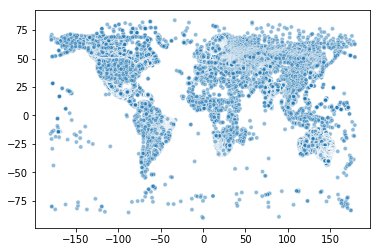

In [44]:
# find out where the stations are by ploting longitude vs. latitude
sns.scatterplot(x=stations['longitude'],y=stations['latitude'],size=0.1, legend=False, alpha = 0.5)

In [45]:
# Just look at Texas stations
stations_tx = stations[stations['state'] == 'TX']

In [46]:
stations_tx

array([('US1TXAC0002', 33.8281, -98.5492, 305.7, 'TX', 'WICHITA FALLS 5.2 SSW', '', '', ''),
       ('US1TXAC0003', 33.5838, -98.6298, 323.7, 'TX', 'ARCHER CITY 0.7 SSW', '', '', ''),
       ('US1TXAC0005', 33.7762, -98.535 , 300.2, 'TX', 'WICHITA FALLS 8.5 S', '', '', ''),
       ...,
       ('USW00093928', 32.7667, -96.7833, 195.1, 'TX', 'DALLAS WBO', '', '', ''),
       ('USW00093985', 32.7817, -98.0603, 283.5, 'TX', 'MINERAL WELLS AP', '', '', ''),
       ('USW00093987', 31.2361, -94.7544,  87.8, 'TX', 'LUFKIN ANGELINA CO AP', '', '', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcncrn', '<U4'), ('wmo_id', '<U6')])

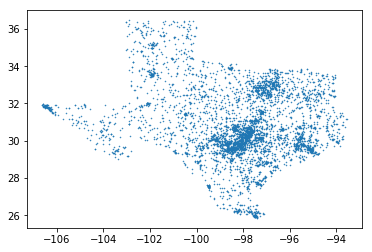

In [49]:
plt.plot(stations_tx['longitude'],stations_tx['latitude'],'.', markersize =1)

In [50]:
# Look for California stations
station_ca = stations[stations['state'] == 'CA']

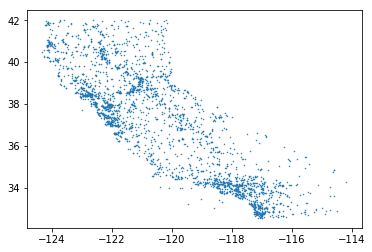

In [51]:
plt.plot(stations_ca['longitude'],stations_ca['latitude'],'.', markersize =1)

In [53]:
# try to find an individual station named pasadena
stations[stations['name'] == 'PASADENA']

array([('USC00046719', 34.1483, -118.1447, 263.3, 'CA', 'PASADENA', '', 'HCN', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcncrn', '<U4'), ('wmo_id', '<U6')])

In [55]:
# try to find all instances where PASADENA appears in a string under name
stations[np.char.find(stations['name'],'PASADENA') == 0]

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', ''),
       ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', ''),
       ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', ''),
       ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', ''),
       ('US1TXHRR094', 29.6746,  -95.2104,   9.1, 'TX', 'PASADENA 3.6 WNW', '', '', ''),
       ('USC00046719', 34.1

In [157]:
# download from the internet the .ply file of the PASADENA station
station_pas = f'PASADENA.dly'


In [158]:
station_pas

'PASADENA.dly'

In [159]:
station_file = getfile(station_name)

NameError: name 'getfile' is not defined

In [160]:
weather = np.genfromtxt('Data/weather/PASADENA.dly',
                      delimiter=[11,4,2,4] + [5,1,1,1]*31,
                      # we will not use the daily flags, so this list becomes
                      # 0, 1, 2, 3, 4, 8, 12, 16, 20, 24...
                      usecols=[0,1,2,3] + list(range(4,4*32,4)),
                      # the names of the daily observations will be day1, day2, day3, ...
                      names=['id','year','month','element'] + [f'day{i}' for i in range(1,32)],
                      dtype=['U11','i','i','U4'] + ['d']*31,
                      autostrip=True)


In [161]:
weather

array([('USC00046719', 1893, 1, 'TMAX',   244.,   272.,   278., 267., 272., 233.,   250.,   267.,   250.,   194., 156., 244., 228., 200.,   206.,  1.560e+02,   144.,   200.,   233.,   206.,   244.,   239.,   261.,   261., 211., 111., 144.,  1.560e+02,  1.390e+02,   122.,   144.),
       ('USC00046719', 1893, 1, 'TMIN',    61.,    78.,    78.,  94.,  67.,  50.,    33.,    78.,    50.,    39.,  33.,  56.,  78.,  50.,    94.,  7.200e+01,    28.,    17.,    44.,    61.,    50.,    61.,    78.,    61.,  44.,  28.,  89.,  5.600e+01,  6.100e+01,   100.,    94.),
       ('USC00046719', 1893, 1, 'PRCP',     0.,     0.,     0.,   0.,   0.,   0.,     0.,     0.,     0.,     0.,   0.,   0.,   0.,   0.,     0.,  8.000e+00,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,   0.,  64., 478.,  3.000e+00,  5.000e+00,   798.,   559.),
       ...,
       ('USC00046719', 2020, 1, 'TMIN', -9999., -9999., -9999., 139., 100.,  72., -9999., -9999., -9999.,    56.,  50.,  61.,  61.,  56., -9999.,

In [162]:
# turn into a pandas dataframe
pas_df = pd.DataFrame(weather)

In [163]:
# Data is data by year for one station 
pas_df.head(11)

,id,year,month,element,day1,day2,day3,day4,day5,day6,...,day22,day23,day24,day25,day26,day27,day28,day29,day30,day31
0,USC00046719,1893,1,TMAX,244.0,272.0,278.0,267.0,272.0,233.0,...,239.0,261.0,261.0,211.0,111.0,144.0,156.0,139.0,122.0,144.0
1,USC00046719,1893,1,TMIN,61.0,78.0,78.0,94.0,67.0,50.0,...,61.0,78.0,61.0,44.0,28.0,89.0,56.0,61.0,100.0,94.0
2,USC00046719,1893,1,PRCP,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,64.0,478.0,3.0,5.0,798.0,559.0
3,USC00046719,1893,1,SNOW,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,USC00046719,1893,2,TMAX,156.0,133.0,156.0,144.0,144.0,156.0,...,222.0,250.0,228.0,200.0,161.0,144.0,161.0,-9999.0,-9999.0,-9999.0
5,USC00046719,1893,2,TMIN,72.0,28.0,61.0,56.0,89.0,44.0,...,78.0,72.0,61.0,61.0,72.0,17.0,22.0,-9999.0,-9999.0,-9999.0
6,USC00046719,1893,2,PRCP,3.0,0.0,0.0,0.0,147.0,0.0,...,0.0,0.0,0.0,0.0,43.0,0.0,0.0,-9999.0,-9999.0,-9999.0
7,USC00046719,1893,2,SNOW,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999.0,-9999.0,-9999.0
8,USC00046719,1893,3,TMAX,144.0,133.0,161.0,100.0,111.0,128.0,...,167.0,183.0,194.0,222.0,189.0,278.0,294.0,211.0,206.0,211.0
9,USC00046719,1893,3,TMIN,39.0,56.0,33.0,61.0,56.0,28.0,...,28.0,39.0,56.0,56.0,72.0,94.0,106.0,72.0,78.0,83.0


In [164]:
pas_df.describe()

,year,month,day1,day2,day3,day4,day5,day6,day7,day8,...,day22,day23,day24,day25,day26,day27,day28,day29,day30,day31
count,7344.000000,7344.000000,7344.00000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,...,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000
mean,1965.337691,6.481890,-525.32884,-516.692947,-528.001906,-512.408361,-533.205746,-553.777505,-539.247821,-529.496732,...,-504.581563,-513.049020,-525.082108,-526.273420,-508.379493,-513.927424,-518.323529,-1116.529276,-1295.830202,-4431.494281
std,31.054719,3.467237,2434.66256,2419.694035,2439.574091,2412.152579,2449.616697,2486.438132,2459.354463,2442.052955,...,2396.850655,2411.944491,2434.685916,2437.233794,2404.587527,2414.592571,2422.124580,3290.043240,3487.218979,5023.537569
min,1893.000000,1.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,1942.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000
50%,1966.000000,6.000000,1.00000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,...,5.000000,3.000000,1.000000,1.000000,3.000000,5.000000,3.000000,0.000000,0.000000,0.000000
75%,1991.000000,9.000000,178.00000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,172.000000,167.000000,83.000000
max,2020.000000,12.000000,1577.00000,1956.000000,813.000000,1135.000000,1321.000000,892.000000,932.000000,986.000000,...,1798.000000,1488.000000,1588.000000,1245.000000,1654.000000,902.000000,1143.000000,1410.000000,798.000000,1567.000000


In [165]:
pas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 35 columns):
id         7344 non-null object
year       7344 non-null int32
month      7344 non-null int32
element    7344 non-null object
day1       7344 non-null float64
day2       7344 non-null float64
day3       7344 non-null float64
day4       7344 non-null float64
day5       7344 non-null float64
day6       7344 non-null float64
day7       7344 non-null float64
day8       7344 non-null float64
day9       7344 non-null float64
day10      7344 non-null float64
day11      7344 non-null float64
day12      7344 non-null float64
day13      7344 non-null float64
day14      7344 non-null float64
day15      7344 non-null float64
day16      7344 non-null float64
day17      7344 non-null float64
day18      7344 non-null float64
day19      7344 non-null float64
day20      7344 non-null float64
day21      7344 non-null float64
day22      7344 non-null float64
day23      7344 non-null float64
day24   

In [166]:
# Note that everyday of the month has a column.  Let's parse or 'melt' to get a nicer outlay with less columns
pas_df = pd.melt(pas_df, id_vars=['id','year','month','element'], var_name='day', value_name='value')

In [167]:
pas_df

,id,year,month,element,day,value
0,USC00046719,1893,1,TMAX,day1,244.0
1,USC00046719,1893,1,TMIN,day1,61.0
2,USC00046719,1893,1,PRCP,day1,0.0
3,USC00046719,1893,1,SNOW,day1,0.0
4,USC00046719,1893,2,TMAX,day1,156.0
5,USC00046719,1893,2,TMIN,day1,72.0
6,USC00046719,1893,2,PRCP,day1,3.0
7,USC00046719,1893,2,SNOW,day1,0.0
8,USC00046719,1893,3,TMAX,day1,144.0
9,USC00046719,1893,3,TMIN,day1,39.0


In [168]:
pas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227664 entries, 0 to 227663
Data columns (total 6 columns):
id         227664 non-null object
year       227664 non-null int32
month      227664 non-null int32
element    227664 non-null object
day        227664 non-null object
value      227664 non-null float64
dtypes: float64(1), int32(2), object(3)
memory usage: 8.7+ MB


In [169]:
# dataframe metrics.  Note the -9999 null value
pas_df.describe()

,year,month,value
count,227664.000000,227664.000000,227664.000000
mean,1965.337691,6.481890,-695.122545
std,31.052672,3.467009,2720.962236
min,1893.000000,1.000000,-9999.000000
25%,1942.000000,3.000000,0.000000
50%,1966.000000,6.000000,0.000000
75%,1991.000000,9.000000,178.000000
max,2020.000000,12.000000,1956.000000


In [170]:
# get rid of null values 
pas_df = pas_df[pas_df['value'] != -9999]

In [171]:
pas_df.describe()

,year,month,value
count,209754.000000,209754.000000,209754.000000
mean,1965.970852,6.526584,99.295894
std,31.328462,3.448534,116.157983
min,1893.000000,1.000000,-111.000000
25%,1942.000000,4.000000,0.000000
50%,1968.000000,7.000000,50.000000
75%,1992.000000,10.000000,189.000000
max,2020.000000,12.000000,1956.000000


In [172]:
pas_df.head()

,id,year,month,element,day,value
0,USC00046719,1893,1,TMAX,day1,244.0
1,USC00046719,1893,1,TMIN,day1,61.0
2,USC00046719,1893,1,PRCP,day1,0.0
3,USC00046719,1893,1,SNOW,day1,0.0
4,USC00046719,1893,2,TMAX,day1,156.0


In [173]:
# convert the string 'day1', etc. to just an integer 1 using a lambda expression and .apply function
pas_df['day'] = pas_df['day'].apply(lambda i: int(i[3:]))


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [174]:
pas_df.head()

,id,year,month,element,day,value
0,USC00046719,1893,1,TMAX,1,244.0
1,USC00046719,1893,1,TMIN,1,61.0
2,USC00046719,1893,1,PRCP,1,0.0
3,USC00046719,1893,1,SNOW,1,0.0
4,USC00046719,1893,2,TMAX,1,156.0


In [175]:
# Convert the day month year into a datetime element in a date column so that you can easily call the values
pas_df['date'] = pd.to_datetime(pas_df[['year','month','day']])

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [176]:
pas_df.head()

,id,year,month,element,day,value,date
0,USC00046719,1893,1,TMAX,1,244.0,1893-01-01
1,USC00046719,1893,1,TMIN,1,61.0,1893-01-01
2,USC00046719,1893,1,PRCP,1,0.0,1893-01-01
3,USC00046719,1893,1,SNOW,1,0.0,1893-01-01
4,USC00046719,1893,2,TMAX,1,156.0,1893-02-01


In [177]:
# drop unnecessary columns now 
pas_df = pas_df[['date','element','value']]

In [178]:
pas_df.head()

,date,element,value
0,1893-01-01,TMAX,244.0
1,1893-01-01,TMIN,61.0
2,1893-01-01,PRCP,0.0
3,1893-01-01,SNOW,0.0
4,1893-02-01,TMAX,156.0


In [179]:
#Restructure the dataframe so that elements appear in the same row for the same day. Unmelt the dataframe essentially 
# make the date the index
pas_df = pas_df.pivot(index='date',columns='element')['value']

In [180]:
pas_df.head()

element,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT07,WT08,WT11,WT14,WT16
date,,,,,,,,,,,,,,,,,,
1893-01-01,NaN,NaN,0.0,0.0,NaN,244.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893-01-02,NaN,NaN,0.0,0.0,NaN,272.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893-01-03,NaN,NaN,0.0,0.0,NaN,278.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893-01-04,NaN,NaN,0.0,0.0,NaN,267.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893-01-05,NaN,NaN,0.0,0.0,NaN,272.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# Get rid of everything that isn't precipiation, tmax, tmin and snow
pas_df = pas_df[['PRCP','TMAX','TMIN','SNOW']]

In [183]:
pas_df.head()

element,PRCP,TMAX,TMIN,SNOW
date,,,,
1893-01-01,0.0,244.0,61.0,0.0
1893-01-02,0.0,272.0,78.0,0.0
1893-01-03,0.0,278.0,78.0,0.0
1893-01-04,0.0,267.0,94.0,0.0
1893-01-05,0.0,272.0,67.0,0.0


In [184]:
pas_df.columns.name = None

In [185]:
pas_df = pas_df[['TMIN','TMAX','PRCP','SNOW']]


In [186]:
pas_df.head()


,TMIN,TMAX,PRCP,SNOW
date,,,,
1893-01-01,61.0,244.0,0.0,0.0
1893-01-02,78.0,272.0,0.0,0.0
1893-01-03,78.0,278.0,0.0,0.0
1893-01-04,94.0,267.0,0.0,0.0
1893-01-05,67.0,272.0,0.0,0.0


In [187]:
pas_df['TMIN'][0:4]

date
1893-01-01    61.0
1893-01-02    78.0
1893-01-03    78.0
1893-01-04    94.0
Name: TMIN, dtype: float64

In [188]:
# change temperature to degrees
pas_df['TMIN'] /= 10

In [189]:
pas_df['TMAX'] /= 10

In [190]:
pas_df.tail()

,TMIN,TMAX,PRCP,SNOW
date,,,,
2020-01-13,6.1,17.2,0.0,NaN
2020-01-14,5.6,16.7,0.0,NaN
2020-01-25,9.4,23.3,0.0,NaN
2020-01-26,10.6,22.8,0.0,NaN
2020-01-27,7.2,16.1,0.0,NaN


In [141]:
# This is one way of changing NaN values.  A better way is outlined below for thes dataset 
# GET RID OF NaNs by changing the NaN values to the mean of the non-NaN values!!!!!! 
pas_df['TMIN'][np.isnan(pas_df['TMIN'])]

Series([], Name: TMIN, dtype: float64)

In [142]:
np.nanmean(pas_df['TMIN'])

1.0750008507328455

In [143]:
# pas_df['TMIN'][np.isnan(pas_df['TMIN'])] = np.nanmean(pas_df['TMIN'])

In [144]:
# pas_df['TMAX'][np.isnan(pas_df['TMAX'])] = np.nanmean(pas_df['TMAX'])

In [145]:
# set PRCP equal to zero where there is a Nan

# pas_df['PRCP'][np.isnan(pas_df['PRCP'])] = np.nanmean(pas_df['PRCP'])

In [146]:
# set SNOW equal to zero where there is a Nan
# pas_df['SNOW'][np.isnan(pas_df['SNOW'])] = 0

In [147]:
# pas_df['SNOW'][np.isnan(pas_df['SNOW'])]

Series([], Name: SNOW, dtype: float64)

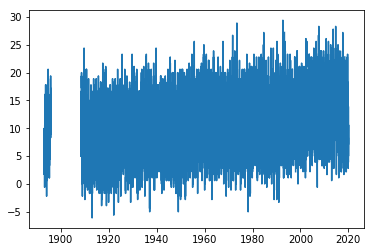

In [191]:
plt.plot(pas_df['TMIN'])

In [192]:
# lets look at the year 2000 in particular 
pas_2000 = pas_df[pas_df.index.year == 2000]

In [193]:
pas_2000.head()

,TMIN,TMAX,PRCP,SNOW
date,,,,
2000-01-01,6.1,14.4,25.0,0.0
2000-01-02,6.1,18.3,0.0,0.0
2000-01-03,3.9,18.3,0.0,0.0
2000-01-04,6.1,20.0,0.0,0.0
2000-01-05,6.1,20.6,0.0,0.0


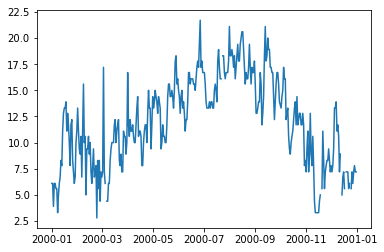

In [194]:
plt.plot(pas_2000['TMIN'])

In [196]:
# count up the number of NaN 
np.isnan(pas_2000['TMIN'])

date
2000-01-01    False
2000-01-02    False
2000-01-03    False
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07    False
2000-01-08    False
2000-01-09    False
2000-01-10    False
2000-01-11    False
2000-01-12    False
2000-01-13    False
2000-01-14    False
2000-01-15    False
2000-01-16    False
2000-01-17    False
2000-01-18    False
2000-01-19    False
2000-01-20    False
2000-01-21    False
2000-01-22    False
2000-01-23    False
2000-01-24    False
2000-01-25    False
2000-01-26    False
2000-01-27    False
2000-01-28    False
2000-01-29    False
2000-01-30    False
              ...  
2000-12-02    False
2000-12-03    False
2000-12-04    False
2000-12-05    False
2000-12-06    False
2000-12-07    False
2000-12-08    False
2000-12-09    False
2000-12-10    False
2000-12-11    False
2000-12-12    False
2000-12-13     True
2000-12-14    False
2000-12-15    False
2000-12-16    False
2000-12-17    False
2000-12-18     True
2000-12-19    False
2000-12-20    F

In [200]:
# USE INTERPOLATION TO FLL IN FOR NaN Temperature data.  Likely a better option than filling in the MEAN
good = ~np.isnan(pas_2000['TMIN'])
x = np.arange(0,len(good))

np.interp(x,x[good], pas_2000['TMIN'][good])

array([ 6.1 ,  6.1 ,  3.9 ,  6.1 ,  6.1 ,  5.6 ,  5.6 ,  3.3 ,  5.  ,
        6.1 ,  6.7 ,  8.3 ,  7.8 , 11.1 , 12.8 , 13.3 , 13.3 , 13.9 ,
       11.1 , 12.8 , 11.7 , 10.  ,  7.8 , 11.7 , 12.2 ,  8.3 ,  7.2 ,
        6.1 ,  6.7 , 10.  , 11.1 , 13.3 , 11.1 ,  9.4 ,  8.9 , 10.6 ,
        6.7 , 15.6 , 10.  , 10.6 ,  5.  ,  9.4 ,  9.4 , 10.6 ,  8.9 ,
       10.  ,  7.2 ,  6.1 ,  7.8 ,  9.4 ,  6.7 ,  7.2 ,  7.8 ,  2.8 ,
        8.3 ,  5.6 ,  8.3 ,  4.4 ,  7.2 ,  6.7 ,  7.2 , 17.2 ,  7.2 ,
        6.1 ,  5.25,  4.4 ,  4.4 ,  6.1 ,  6.1 ,  8.3 ,  9.4 , 10.  ,
       10.  , 10.  , 11.7 , 12.2 , 10.  , 11.1 , 11.7 , 12.2 ,  8.3 ,
        7.8 ,  8.9 ,  7.2 ,  7.2 , 11.1 , 10.6 , 10.6 ,  8.9 , 10.  ,
       16.7 , 11.7 , 10.6 , 12.2 , 11.1 , 11.1 , 11.7 , 10.6 , 10.  ,
       10.  , 11.7 , 13.3 , 14.4 , 10.6 , 11.1 , 11.1 , 10.6 ,  7.8 ,
        7.8 , 10.  , 11.1 , 11.7 , 11.7 , 10.  , 12.8 , 15.  , 13.3 ,
       13.3 ,  9.4 , 11.7 , 14.4 , 13.3 , 13.9 , 15.  , 14.4 , 13.9 ,
       12.8 , 14.4 ,

In [201]:
# function that does the same thing
def fillnan(value):
    good = ~np.isnan(value)
    x = np.arange(len(value))
    
    return np.interp(x,x[good],value[good])

In [203]:
fillnan(pas_2000['TMAX'])

array([14.4 , 18.3 , 18.3 , 20.  , 20.6 , 20.  , 18.3 , 21.7 , 20.6 ,
       18.3 , 18.9 , 17.8 , 24.4 , 26.1 , 26.1 , 23.9 , 20.6 , 24.4 ,
       25.6 , 21.7 , 18.3 , 18.3 , 20.  , 22.8 , 21.7 , 20.6 , 20.6 ,
       21.7 , 21.7 , 17.8 , 16.7 , 24.4 , 26.7 , 26.7 , 23.9 , 21.1 ,
       25.  , 26.7 , 23.9 , 19.4 , 18.3 , 17.8 , 15.6 , 16.7 , 19.4 ,
       16.7 , 17.2 , 22.2 , 25.  , 23.9 , 13.3 , 13.9 , 12.8 , 16.1 ,
       15.  , 21.7 , 20.6 , 17.2 , 18.3 , 19.4 , 22.2 , 20.  , 15.  ,
       12.8 , 13.9 , 15.  , 15.  , 18.3 , 23.9 , 28.9 , 27.2 , 25.6 ,
       28.3 , 27.2 , 25.6 , 26.1 , 30.6 , 29.4 , 22.2 , 23.9 , 26.1 ,
       23.3 , 23.9 , 22.8 , 26.7 , 21.1 , 18.9 , 17.8 , 22.2 , 27.8 ,
       30.6 , 31.1 , 28.3 , 29.4 , 27.8 , 28.3 , 25.6 , 30.6 , 29.4 ,
       25.6 , 30.6 , 32.2 , 29.4 , 25.6 , 22.2 , 22.8 , 20.  , 18.3 ,
       22.8 , 28.9 , 25.6 , 20.6 , 22.2 , 28.9 , 31.1 , 35.  , 33.9 ,
       25.6 , 28.3 , 32.8 , 32.2 , 30.6 , 28.9 , 27.8 , 25.6 , 26.7 ,
       26.7 , 25.  ,

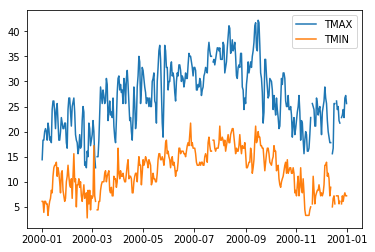

In [205]:
plt.plot(pas_2000['TMAX'])
plt.plot(pas_2000['TMIN'])
plt.legend()

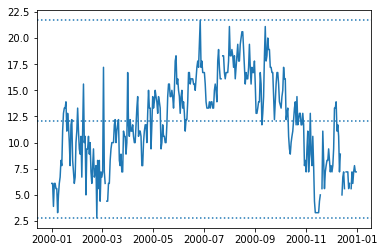

In [206]:
# plot an axhline for the tmin data

plt.plot(pas_2000['TMIN'])
for value in [np.mean(pas_2000['TMIN']),np.min(pas_2000['TMIN']),np.max(pas_2000['TMIN'])]:
    plt.axhline(value,linestyle=':')

In [207]:
# plot the mean and standard devitation 

mean, err = np.mean(pas_2000['TMIN']), math.sqrt(np.var(pas_2000['TMIN']))

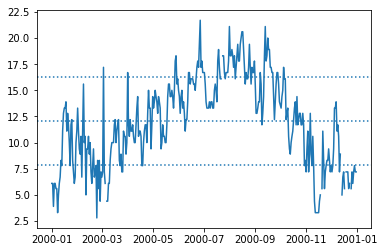

In [208]:
plt.plot(pas_2000['TMIN'])

for value in [mean, mean-err,mean+err]:
    plt.axhline(value,linestyle=':')

In [209]:
# Look at the rain next 
rain = pas_2000['PRCP']

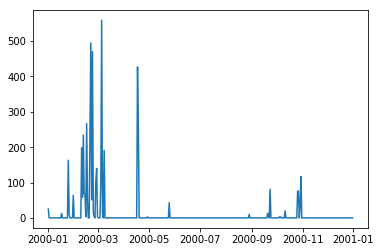

In [212]:
plt.plot(rain)

In [ ]:
#smooth the data